# **Data Loading**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Medical Price Dataset.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Data Pre-processing**

## **Checking for null values**

In [3]:
df.isnull().values.any()

False

## **Data Visualisations**

<function matplotlib.pyplot.show(close=None, block=None)>

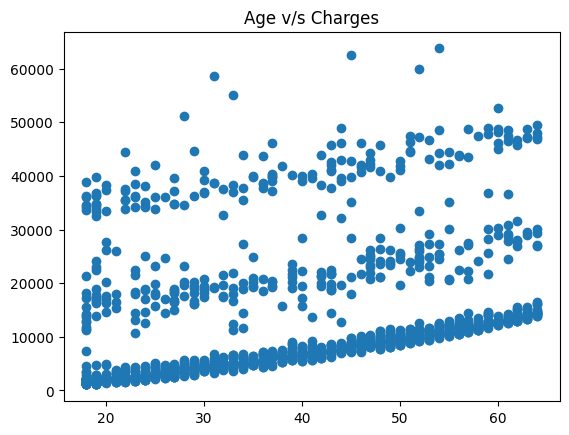

In [4]:
x = df['age']
y = df['charges']

plt.scatter(x,y)
plt.title('Age v/s Charges')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

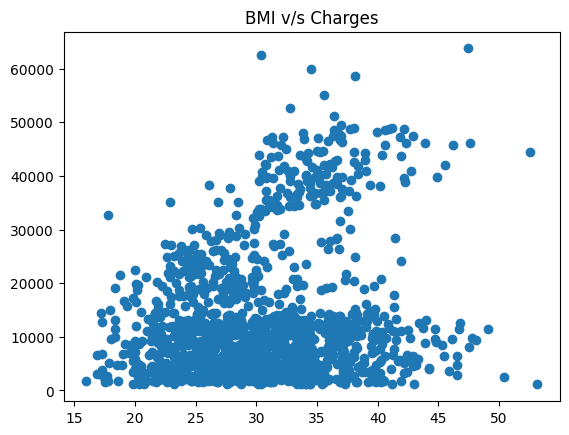

In [5]:
x = df['bmi']
y = df['charges']

plt.scatter(x,y)
plt.title('BMI v/s Charges')
plt.show

## **Encoding Categorical Variables (One-hot encoding)** 

In [6]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
df_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


## **Normalisation**



In [7]:
df_encoded.min()

age                   18.0000
bmi                   15.9600
children               0.0000
charges             1121.8739
sex_female             0.0000
sex_male               0.0000
smoker_no              0.0000
smoker_yes             0.0000
region_northeast       0.0000
region_northwest       0.0000
region_southeast       0.0000
region_southwest       0.0000
dtype: float64

In [8]:
df_encoded.max()

age                    64.00000
bmi                    53.13000
children                5.00000
charges             63770.42801
sex_female              1.00000
sex_male                1.00000
smoker_no               1.00000
smoker_yes              1.00000
region_northeast        1.00000
region_northwest        1.00000
region_southeast        1.00000
region_southwest        1.00000
dtype: float64

In [9]:
df_norm = (df_encoded - df_encoded.min()) / (df_encoded.max() - df_encoded.min())
df_norm

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,0.000000,0.429379,0.0,0.017305,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,0.000000,0.562012,0.0,0.008108,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,0.065217,0.264730,0.0,0.014144,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## **Standardisation**



In [10]:
df_encoded.mean()

age                    39.207025
bmi                    30.663397
children                1.094918
charges             13270.422265
sex_female              0.494768
sex_male                0.505232
smoker_no               0.795217
smoker_yes              0.204783
region_northeast        0.242152
region_northwest        0.242900
region_southeast        0.272048
region_southwest        0.242900
dtype: float64

In [11]:
df_encoded.std()

age                    14.049960
bmi                     6.098187
children                1.205493
charges             12110.011237
sex_female              0.500160
sex_male                0.500160
smoker_no               0.403694
smoker_yes              0.403694
region_northeast        0.428546
region_northwest        0.428995
region_southeast        0.445181
region_southwest        0.428995
dtype: float64

In [12]:
df_std = (df_encoded - df_encoded.mean()) / df_encoded.std()
df_std

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438227,-0.453151,-0.908274,0.298472,1.010141,-1.010141,-1.969850,1.969850,-0.565056,-0.566206,-0.611095,1.764821
1,-1.509401,0.509431,-0.078738,-0.953333,-0.989221,0.989221,0.507273,-0.507273,-0.565056,-0.566206,1.635183,-0.566206
2,-0.797655,0.383164,1.580335,-0.728402,-0.989221,0.989221,0.507273,-0.507273,-0.565056,-0.566206,1.635183,-0.566206
3,-0.441782,-1.305043,-0.908274,0.719574,-0.989221,0.989221,0.507273,-0.507273,-0.565056,1.764821,-0.611095,-0.566206
4,-0.512957,-0.292447,-0.908274,-0.776512,-0.989221,0.989221,0.507273,-0.507273,-0.565056,1.764821,-0.611095,-0.566206
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768185,0.050278,1.580335,-0.220468,-0.989221,0.989221,0.507273,-0.507273,-0.565056,1.764821,-0.611095,-0.566206
1334,-1.509401,0.206062,-0.908274,-0.913661,1.010141,-1.010141,0.507273,-0.507273,1.768415,-0.566206,-0.611095,-0.566206
1335,-1.509401,1.014499,-0.908274,-0.961237,1.010141,-1.010141,0.507273,-0.507273,-0.565056,-0.566206,1.635183,-0.566206
1336,-1.295877,-0.797515,-0.908274,-0.930014,1.010141,-1.010141,0.507273,-0.507273,-0.565056,-0.566206,-0.611095,1.764821


# **Data Splits (Train & Test sets)**

## **For Normalised Dataframe.**

In [13]:
# Setting a random seed for reproducibility
np.random.seed(42)

# Shuffling the data
df_norm = df_norm.sample(frac=1).reset_index(drop=True)

feature_columns = ['age',	'bmi',	'children',	'sex_female',	'sex_male',	'smoker_no',	'smoker_yes',	'region_northeast',	'region_northwest',	'region_southeast',	'region_southwest']
output_column = 'charges'

# Splitting the data into training and testing sets
train_ratio = 0.75  # Percentage of data to use for training
train_size = int(train_ratio * len(df_norm))

x_train_n = df_norm.loc[:train_size, feature_columns].values         # Features for training
y_train_n = df_norm.loc[:train_size, output_column].values           # Output for training

x_test_n = df_norm.loc[train_size:, feature_columns].values          # Features for testing
y_test_n = df_norm.loc[train_size:, output_column].values            # Output for testing


#.values (for numpy arrays) 
# Printing the training and testing sets
print("Training set:")
print("X_train:\n", x_train_n)
print("Y_train:\n", y_train_n)

print("\nTesting set:")
print("X_test:\n", x_test_n)
print("Y_test:\n", y_test_n)

Training set:
X_train:
 [[0.58695652 0.24791499 0.4        ... 0.         0.         0.        ]
 [0.39130435 0.37826204 0.         ... 1.         0.         0.        ]
 [1.         0.29391983 0.         ... 1.         0.         0.        ]
 ...
 [0.         0.38081786 0.         ... 0.         0.         0.        ]
 [0.30434783 0.34759214 0.         ... 1.         0.         0.        ]
 [0.80434783 0.56873823 0.         ... 0.         0.         1.        ]]
Y_train:
 [0.12726861 0.06624737 0.4502755  ... 0.32280031 0.04381556 0.15310441]

Testing set:
X_test:
 [[0.80434783 0.56873823 0.         ... 0.         0.         1.        ]
 [0.65217391 0.3669626  0.         ... 0.         0.         1.        ]
 [0.         0.57384988 0.2        ... 0.         1.         0.        ]
 ...
 [0.86956522 0.24791499 0.         ... 0.         0.         0.        ]
 [0.41304348 0.85122411 0.4        ... 0.         0.         1.        ]
 [0.80434783 0.37503363 0.         ... 0.         0.     

## **For Standardised Dataframe**

In [14]:
# Setting a random seed for reproducibility
np.random.seed(42)

# Shuffling the data
df_std = df_std.sample(frac=1).reset_index(drop=True)

feature_columns = ['age',	'bmi',	'children',	'sex_female',	'sex_male',	'smoker_no',	'smoker_yes',	'region_northeast',	'region_northwest',	'region_southeast',	'region_southwest']
output_column = 'charges'

# Splitting the data into training and testing sets
train_ratio = 0.75  # Percentage of data to use for training
train_size = int(train_ratio * len(df_std))

x_train_s = df_std.loc[:train_size, feature_columns].values         # Features for training
y_train_s = df_std.loc[:train_size, output_column].values           # Output for training

x_test_s = df_std.loc[train_size:, feature_columns].values          # Features for testing
y_test_s = df_std.loc[train_size:, output_column].values            # Output for testing

#.values (for numpy arrays) 

# Printing the training and testing sets
print("Training set:")
print("X_train:\n", x_train_n)
print("Y_train:\n", y_train_n)

print("\nTesting set:")
print("X_test:\n", x_test_n)
print("Y_test:\n", y_test_n)

Training set:
X_train:
 [[0.58695652 0.24791499 0.4        ... 0.         0.         0.        ]
 [0.39130435 0.37826204 0.         ... 1.         0.         0.        ]
 [1.         0.29391983 0.         ... 1.         0.         0.        ]
 ...
 [0.         0.38081786 0.         ... 0.         0.         0.        ]
 [0.30434783 0.34759214 0.         ... 1.         0.         0.        ]
 [0.80434783 0.56873823 0.         ... 0.         0.         1.        ]]
Y_train:
 [0.12726861 0.06624737 0.4502755  ... 0.32280031 0.04381556 0.15310441]

Testing set:
X_test:
 [[0.80434783 0.56873823 0.         ... 0.         0.         1.        ]
 [0.65217391 0.3669626  0.         ... 0.         0.         1.        ]
 [0.         0.57384988 0.2        ... 0.         1.         0.        ]
 ...
 [0.86956522 0.24791499 0.         ... 0.         0.         0.        ]
 [0.41304348 0.85122411 0.4        ... 0.         0.         1.        ]
 [0.80434783 0.37503363 0.         ... 0.         0.     

# **Linear Regression Function**

In [15]:
x_train_n.shape[1]

11

In [16]:
y_train_n[0]

0.12726860920046856

In [17]:
weights = np.random.randn(x_train_n.shape[1], 1)
weights

array([[ 0.69162068],
       [ 1.28614846],
       [ 0.80480318],
       [ 0.93025335],
       [ 0.0397417 ],
       [ 0.01134848],
       [ 0.26705039],
       [ 0.73445281],
       [-0.28331532],
       [ 0.12205393],
       [-0.31034562]])

def linear_regression(x_train, y_train, learning_rate, num_iterations, x_test):

    # Adding a column of ones to x_train for the bias term
    x_train = np.c_[np.ones((x_train.shape[0], 1)), x_train]

    # Initializing weights
    weights = np.random.randn(x_train.shape[1], 1)

    # Performing gradient descent
    for i in range(num_iterations):
        # Compute predictions
        y_pred = x_train.dot(weights)

        # Computing mean squared error
        mse = (1 / x_train.shape[0]) * np.sum((y_pred - y_train) ** 2)

        # Computing gradients
        gradients = (2 / x_train.shape[0]) * x_train.T.dot(y_pred - y_train)

        # Update weights
        weights = weights - learning_rate * gradients
    
    # Add a column of ones to x_test for the bias term
    x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]

    # Compute predictions for x_test
    y_pred = x_test.dot(weights)

    return y_pred # .flatten()

In [18]:
def linear_regression(x_train, y_train, learning_rate, num_iterations, x_test):
    # Initializing random weights and biases
    num_features = x_train.shape[1]
    weights = np.random.randn(num_features)
    bias = np.random.randn()

    # Performing gradient descent
    for iteration in range(num_iterations):
        # Calculating predictions
        predictions = np.dot(x_train, weights) + bias

        # Calculating error
        error = predictions - y_train

        # Calculating mean squared error
        mse = np.mean(np.square(error))

        # Calculating gradients
        grad_weights = (2 / len(x_train)) * np.dot(x_train.T, error)
        grad_bias = (2 / len(x_train)) * np.sum(error)

        # Updating weights and bias
        weights -= learning_rate * grad_weights
        bias -= learning_rate * grad_bias

        # Printig progress
        if iteration % 100 == 0:
            print(f"Iteration: {iteration}, MSE: {mse}")

    # Making predictions on test data
    predictions_test = np.dot(x_test, weights) + bias

    return predictions_test

In [19]:
y_pred_n = linear_regression(x_train_n, y_train_n, 0.01, 500, x_test_n)

Iteration: 0, MSE: 2.3178588243768345
Iteration: 100, MSE: 0.5593807419965727
Iteration: 200, MSE: 0.36503769670267333
Iteration: 300, MSE: 0.2689682906746944
Iteration: 400, MSE: 0.21079229229005758
